# Введение

В данной работе для анализа взят датасет с сайта TMDb. Датасет содержит более 10 тысяч строк с информацией о фильмах, представленных на сайте, включая оценки пользователей, бюджет фильма, доходы в прокате.

Для начала импортируем библиотеки и считаем файл с данными.

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [2]:
# Считывание файла с информацией
df = pd.read_csv('data/movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
df.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
# Статистические показатели
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


# ПЕРВИЧНЫЙ АНАЛИЗ

Сразу бросается в глаза, что:
- Валюта в столбцах "popularity", "budget" не указана. Судя по порядку цифр стоит предположить, что это доллары США ($)
- Есть лишние столбцы ('id', 'imdb_id', 'homepage'), которые по большей части не несут для нас в данный момент смысловой нагрузки, и их можно убрать
- Столбец "release_date" следует перевести в формат "datetime"
- В датасете есть строки, где бюджет фильма и его валовый доход равняются 0. На это стоит обратить внимание

In [6]:
#поскольку датасет также содержит нулевые значения
#подсчитаем общее количество строк в каждом столбце, содержащих нулевые значения
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
#заполним нулевые значения нулем, используя функцию 'fillna'
df.fillna(0)
print()

# ОЧИСТКА ДАННЫХ

Информация, Которую Нам Необходимо Удалить Или Изменить:
- Удалим все повторяющиеся строки из набора данных;
- Переведем формат даты выпуска фильма в формат 'datetime';
- Удалим неиспользуемые столбцы, которые не нужны в процессе анализа;
- Удалим фильмы, у которых бюджет и доход равны нулю.

## 1. Удаление повторяющихся строк

In [8]:
# Функция '#duplicated()' в pandas возвращает повторяющуюся строку как True, а другую - как False
# для подсчета повторяющихся элементов мы суммируем все строки

sum(df.duplicated())

1

In [9]:
#После подсчета повторящихся строк, мы можем удалить эти строки с помощью функции 'drop_duplicates()'
df.drop_duplicates(inplace = True)

In [10]:
#После удаления проверим количество оставшихся строк
df.shape

(10865, 21)

## 2. Удаление ненужных столбцов

In [11]:
# Удалим ненужных столбцов
df.drop(['imdb_id', 'homepage','overview'],axis=1,inplace=True)

In [12]:
#После удаления проверим количество оставшихся столбцов
df.shape

(10865, 18)

## 3. Смена формата даты выхода на "datetime"

In [13]:
# Данные, указанные в наборе данных, представлены в строковом формате.
# Мзменим это на формат "Datetime"

df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

## 4. Удаление строк, содержащих неправильные или неподходящие значения

Как можно заметить, в этой базе данных фильмов есть много фильмов, где бюджет или доход имеют значение "0", что означает, что значения этих переменных для этих фильмов не были записаны. Подсчет прибыли от этих фильмов привел бы к неадекватным результатам. Я думаю, что это может быть связано с различными факторами, такими как:
- Недостаток информации о фильмах
- Фильмы так и не были выпущены. 

Я решил удалить эти значения на этапе очистки данных.

In [14]:
# Проверка наличия нулевых значений в столбцах бюджета и доходов

print("Строки с нулевым значением Бюджета:",df[(df['budget']==0)].shape[0])
print("Строки с нулевым значением Дохода:",df[(df['revenue']==0)].shape[0])

Строки с нулевым значением Бюджета: 5696
Строки с нулевым значением Дохода: 6016


# АНАЛИЗ ДАННЫХ

Проведем анализ данного датафрейма


Вопросы, которые можно задать к данному набору данных:

1) В каком году было выпущено больше всего фильмов?

2) Какой Фильм Имеет Самую Высокую Или Самую Низкую Прибыль? Топ-10 фильмов, которые приносят наибольшую прибыль?

3) Какой фильм получил самые высокие или самые низкие голоса (рейтинги)?

4) В Каком Месяце Было Выпущено Наибольшее Количество Фильмов За Все Годы? И Какой Месяц Принес Самый Высокий Средний Доход?

5) Означает ли больший бюджет большую популярность?

6) Влияет ли дата выхода на подсчет голосов и популярность?

7) Означает ли более большая популярность большую прибыль прибыль?

## В каком году было выпущено больше всего фильмов?

release_year
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64


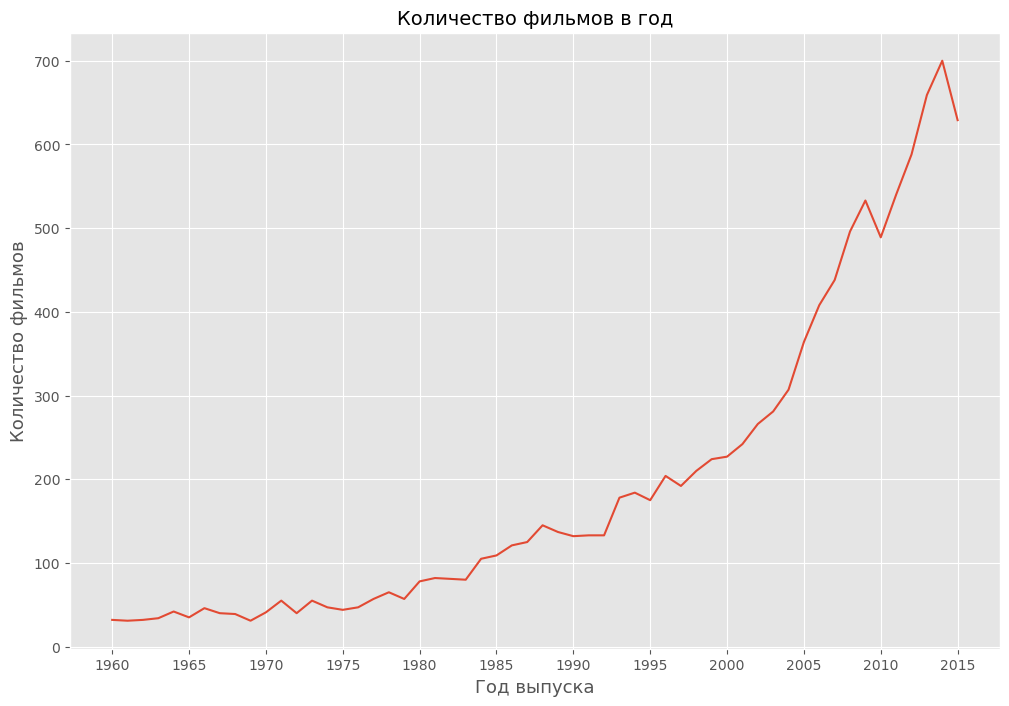

In [15]:
# Сгруппируем строки по годам и подсчитаем количество фильмов в каждом году

data=df.groupby('release_year').count()['id']
print(data.tail())

# Сгруппируем данные в соответствии с годом их выпуска и подсчитаем общее количество фильмов в каждом году и в каждой категории.

df.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))

# Установим настройки отображения графика

sns.set(rc={'figure.figsize':(10,5)})
plt.title("Количество фильмов в год",fontsize = 14)
plt.xlabel('Год выпуска',fontsize = 13)
plt.ylabel('Количество фильмов',fontsize = 13)
#set the style sheet
sns.set_style("whitegrid")

После просмотра графика и выходных данных мы можем сделать вывод, что в 2014 году было выпущено больше всего фильмов (700), за которыми следуют 2013 год (659) и 2015 год (629).

## Какой Фильм Имеет Самую Высокую Или Самую Низкую Прибыль?

In [16]:
# Рассчитаем прибыль для каждого фильма
# Добавим в датафрейм новый столбец "Прибыль"

df['Profit'] = df['revenue'] - df['budget']

def find_minmax(x):
    #Функция idmin находит инкдекс наименьшего по прибыли фильма
    min_index = df[x].idxmin()
    #Функция idmax находит инкдекс наибольшего по прибыли фильма
    high_index = df[x].idxmax()
    high = pd.DataFrame(df.loc[high_index,:])
    low = pd.DataFrame(df.loc[min_index,:])
    
    # Распечатаем фильм с самой высокой и самой низкой прибылью
    print("Фильм с наибольшей прибылью"+ " :",df['original_title'][high_index])
    print("Фильм с наименьшей прибылью"+ " :",df['original_title'][min_index])
    return pd.concat([high,low],axis = 1)

#Вызов функции 
find_minmax('Profit')

Фильм с наибольшей прибылью : Avatar
Фильм с наименьшей прибылью : The Warrior's Way


,1386,2244
id,19995,46528
popularity,9.432768,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
keywords,culture clash|future|space war|space colony|so...,assassin|small town|revenge|deception|super speed
runtime,162,100


Как мы видим, фильм "Аватар" режиссера Джеймса Кэмерона заработал самую высокую прибыль, заработав более 2,5 млрд долларов. И самым провальным по прибыли оказался фильм - "Путь воина". Убыток фильма составил более чем на 400 млн долларов.

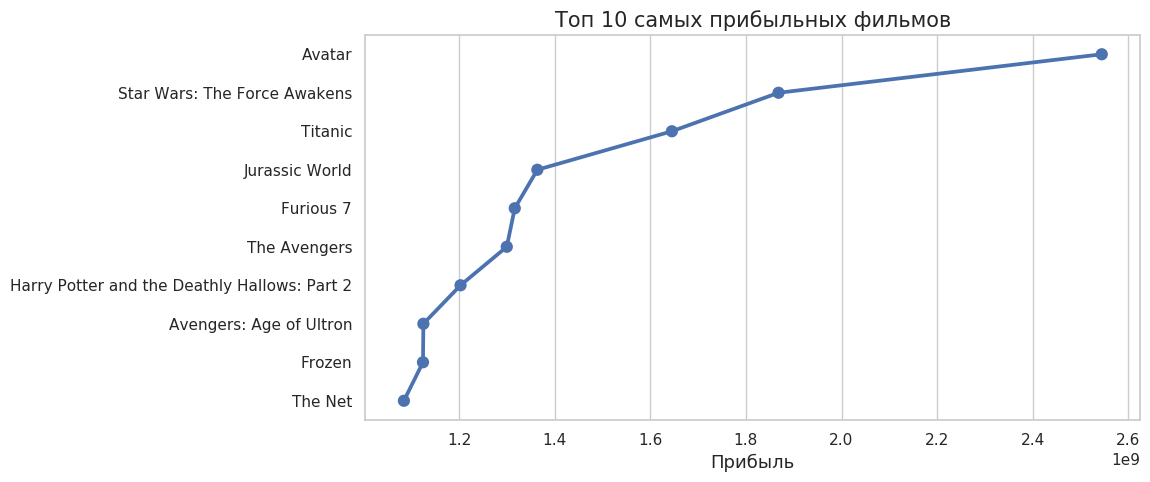

In [17]:
# Построим график, содержащий топ-10 фильмов, которые принесли наибольшую прибыль

info = pd.DataFrame(df['Profit'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:10])
y = list(info['Profit'][:10])
ax = sns.pointplot(x=y,y=x)

#Установим настройки графика
sns.set(rc={'figure.figsize':(7,5)})
ax.set_title("Топ 10 самых прибыльных фильмов",fontsize = 15)
ax.set_xlabel("Прибыль",fontsize = 13)
sns.set_style("whitegrid")

## Какой фильм получил самые высокие или самые низкие голоса (рейтинги)?

In [18]:
# Найдем фильм, набравший наибольшее и наименьшее количество голосов.
# Используем функцию 'find_min max', которую я сделал ранее, передав 'Vote_average' в качестве аргумента.

find_minmax('vote_average')

Фильм с наибольшей прибылью : The Story of Film: An Odyssey
Фильм с наименьшей прибылью : Transmorphers


,3894,7772
id,125336,25055
popularity,0.006925,0.12112
budget,0,0
revenue,0,0
original_title,The Story of Film: An Odyssey,Transmorphers
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Matthew Wolf|Amy Weber|Shaley Scott|Eliza Swen...
director,Mark Cousins,Leigh Scott
tagline,NaN,NaN
keywords,cinema|nouvelle vague|hindi cinema|cinema novo...,futuristic
runtime,900,86


Первый столбец содержит фильм с наивысшим рейтингом, а второй столбец содержит фильм с наименьшим рейтингом.
Как мы видим, фильм "История кино: Одиссея" имеет максимальный рейтинг (92%), а фильм с наименьшими пользовательскими оценками - "Трансморферы" с 15% пользовательских оценок.

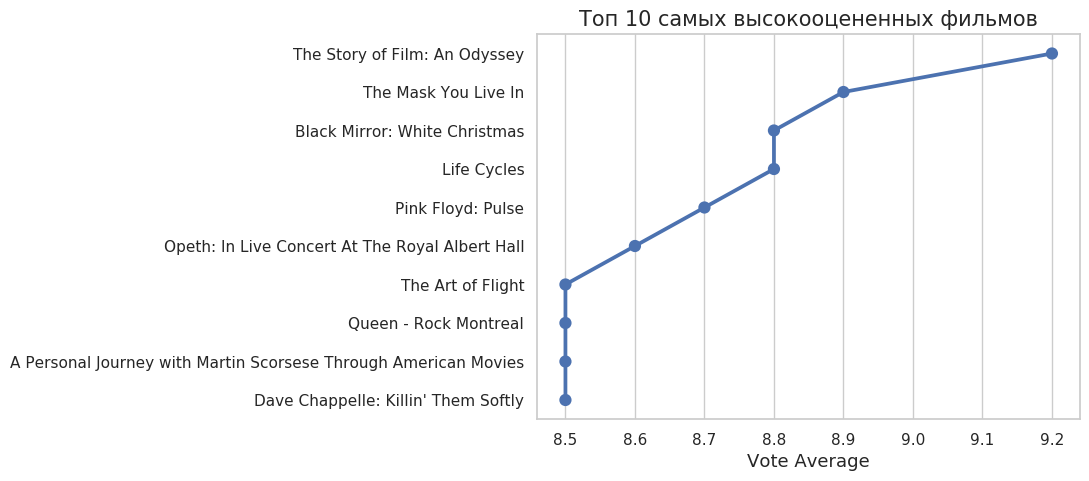

In [19]:
# Топ 10 фильмов по оценкам зрителей
info = pd.DataFrame(df['vote_average'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))

x = list(data[:10])
y = list(info['vote_average'][:10])

#Строим график фильмов с наивысшей оценков
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Топ 10 самых высокооцененных фильмов",fontsize = 15)
ax.set_xlabel("Vote Average",fontsize = 13)
sns.set_style("darkgrid")

## Какой год был самым прибыльным за историю кино?

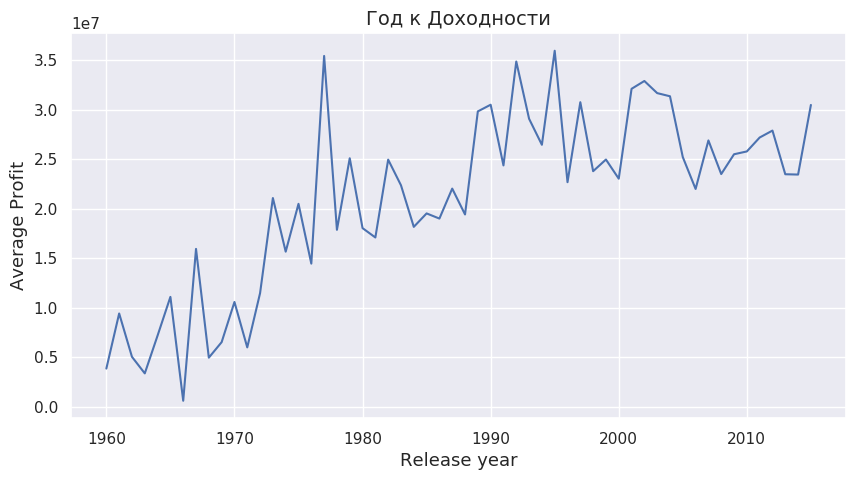

In [20]:
# Проведем годовой анализ прибыли, полученной от фильмов
# Возьмем среднюю прибыль, полученную фильмами за каждый год, и построим график
# Сгруппируем данные в соответствии с их годом выпуска и найдите среднюю прибыль и построим график
df.groupby('release_year')['Profit'].mean().plot()

#Установки для графика
plt.title("Год к Доходности",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Average Profit',fontsize = 13)
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style("whitegrid")

Согласно графику, 1995 год был самым прибыльным, а прибыль была самой низкой в период с 1960 по 1965 год

## Как Доход и популярность зависят от Бюджета и продолжительности фильма? И Как популярность Зависит От прибыли?

Корреляция между Доходом и Бюджетом :  0.6885561524636727


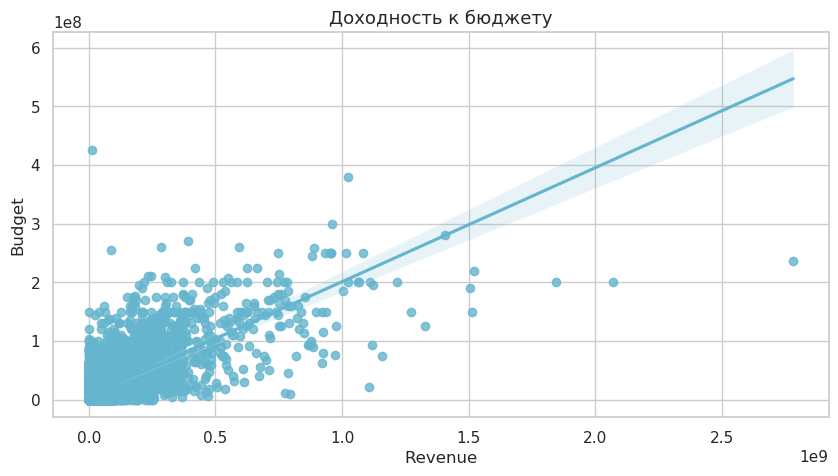

In [21]:
#как меняется доход в зависимости от их бюджета
#создадим точечный график, используя "regplot" между "доходами" и "бюджетом".
ax = sns.regplot(x=df['revenue'], y=df['budget'],color='c')

ax.set_title("Доходность к бюджету",fontsize=13)
ax.set_xlabel("Revenue",fontsize=12)
ax.set_ylabel("Budget",fontsize=12)
#set the figure size
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")

#найдем корреляцию между ними
#изменим ноль на NAN в столбце бюджета и доходов для точного расчета.
df['budget'] = df['budget'].replace(0,np.NAN)
df['revenue'] = df['revenue'].replace(0,np.NAN)
df['Profit'] = df['Profit'].replace(0,np.NAN)

#найдем корреляцию с помощью функции 'corr()'.
#она возвращает датафрейм, который содержит корреляцию между всеми числовыми столбцамиs.
data_corr = df.corr()
print("Корреляция между Доходом и Бюджетом : ",data_corr.loc['revenue','budget'])

Корреляция между годом выпуска и средней оценкой :  -0.11757558609467468


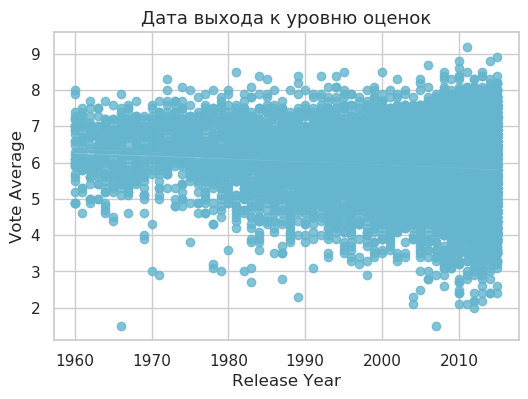

In [22]:
#как меняется среднее значение голосов (рейтинг) в зависимости от года выпуска.
#создадим точечный график, используя "regplot" между "годом" и "средним числом голосов".
ax = sns.regplot(x=df['release_year'], y=df['vote_average'],color='c')

ax.set_title("Дата выхода к уровню оценок",fontsize=13)
ax.set_xlabel("Release Year",fontsize=12)
ax.set_ylabel("Vote Average",fontsize=12)

sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")
print("Корреляция между годом выпуска и средней оценкой : ",data_corr.loc['release_year','vote_average'])

Корреляция между популярностью фильма и прибылью :  0.6159162443059019


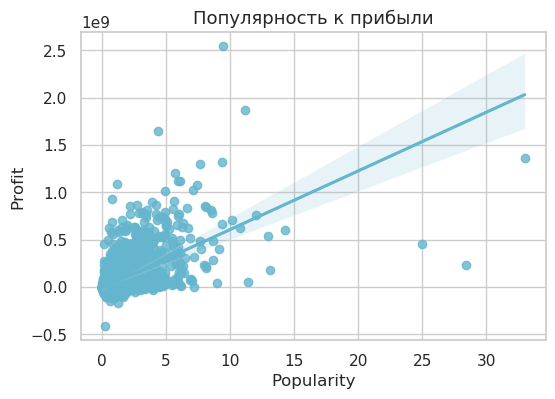

In [23]:
#как изменяется среднее значение голосов (рейтинги) в зависимости от года выпуска.
#создадим точечный график, используя "regplot" между "годом" и "средним числом голосов".
ax = sns.regplot(x=df['popularity'],y=df['Profit'],color='c')

ax.set_title("Популярность к прибыли",fontsize=13)
ax.set_xlabel("Popularity",fontsize=12)
ax.set_ylabel("Profit",fontsize=12)

sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")

print("Корреляция между популярностью фильма и прибылью : ",data_corr.loc['popularity','Profit'])

1. Бюджет и доходы: Бюджет и доходы имеют положительную корреляцию (0,68) между ними. Это означает, что существует большая вероятность того, что фильмы с более высокими инвестициями приведут к увеличению доходов.


2. Прибыль и бюджет: Прибыль и Бюджет имеют положительную корреляцию (0,53) между ними. Это означает, что существует большая вероятность того, что фильмы с более высокими инвестициями принесут большую прибыль.


3. Год выпуска и среднее число голосов: Год выпуска и среднее число голосов имеют отрицательную корреляцию (-0,11). Означает, что рейтинги фильмов (среднее число голосов) не зависят от года выпуска.


4. Популярность и прибыль: Популярность и прибыль имеют положительную корреляцию (0,61). Это означает, что фильм с высокой популярностью, как правило, приносит высокую прибыль.